# **Taxi Tip Prediction**


The aim of this project is to predict taxi tips using a regression tree model to determine the exact tip amount and a logistic regression model to classify the predicted tips into categories (high, medium, low). Additionally, a comparison between logistic regression and random forest models was made to determine the probability of the predicted tips falling into these categories. Visualization methods, including candle plots, were used to assess the bias and effectiveness of these models.

## Table of Contents


<div class="alert alert-block alert-info" style="margin-top: 10px">
    <ol>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#Import Libraries">Import Libraries</a></li>
        <li><a href="#Dataset Analysis">Dataset Analysis</a></li>
        <li><a href="#Dataset Preprocessing">Dataset Preprocessing</a></li>
        <li><a href="#Dataset Train/Test Split">Dataset Train/Test Split</a></li>
        <li><a href="#Decision Tree Regressor model and Evaluation">Decision Tree Regressor model and Evaluation</a></li>
        <li><a href="#LOGISTIC REGRESSION">LOGISTIC REGRESSION</a></li>
        <li><a href="#RANDOM FOREST">RANDOM FOREST</a></li>
        <li><a href="#CONCLUSION">CONCLUSION</a></li>
    </ol>
</div>
<br>
<hr>


<div id="Introduction">
    <h2>1.Introduction</h2>
    <br>The dataset used for this analysis is publicly available on the New York City Taxi & Limousine Commission (TLC) website: TLC Trip Record Data. The TLC Yellow Taxi Trip Records for June 2019 were used for this project. This dataset contains detailed information about taxi trips in New York City, including timestamps, locations, fare amounts, and tips.
    <br>
</div>


<hr>
<div id="import_libraries">
    <h2>2.Import Libraries</h2>
</div>


In [1]:
!pip install snapml

In [2]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import mean_squared_error
from snapml import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression
from snapml import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time
import warnings
import gc, sys
warnings.filterwarnings('ignore')

<hr>
<div id="dataset_analysis">
    <h2>3.Dataset Analysis</h2>
</div>


<p>Some rows of the raw data were removed based on the following criteria:
<ul>
<li>Trips reporting 0 tip.</li>
<li>Trips where the tip amount was larger than the fare cost.</li>
<li>Trips with unusually large fare costs.</li>
<li>The 'total_amount' column was removed to avoid data leakage, as it includes the tip amount and could bias the prediction model.</li>
<li>The cleaning process ensures the dataset is reliable and relevant for the analysis.</li>
<ul>
</p>

In [28]:
# read the input data
raw_data = pd.read_csv('yellow_tripdata_2019-06.csv')
print("There are " + str(len(raw_data)) + " observations in the dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

# display first rows in the dataset
raw_data.head(10)

There are 3936004 observations in the dataset.
There are 18 variables in the dataset.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1.0,0.0,1.0,N,145.0,145.0,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1.0,0.0,1.0,N,262.0,263.0,2.0,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1.0,4.4,1.0,N,74.0,7.0,2.0,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0.0,0.8,1.0,N,145.0,145.0,2.0,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.7,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.6,1.0,N,79.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,14.30,2.5
6,1,2019-06-01 00:46:46,2019-06-01 00:50:55,4.0,0.6,1.0,N,211.0,148.0,2.0,4.5,3.0,0.5,0.00,0.0,0.3,8.30,2.5
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.2,1.0,N,79.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,12.30,2.5
8,1,2019-06-01 00:09:57,2019-06-01 00:25:54,2.0,2.0,1.0,N,158.0,68.0,2.0,11.5,3.0,0.5,0.00,0.0,0.3,15.30,2.5
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.6,1.0,N,186.0,243.0,1.0,31.5,3.0,0.5,7.05,0.0,0.3,42.35,2.5


In [29]:
raw_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

There are 2712719 observations in the dataset.
There are 17 variables in the dataset.


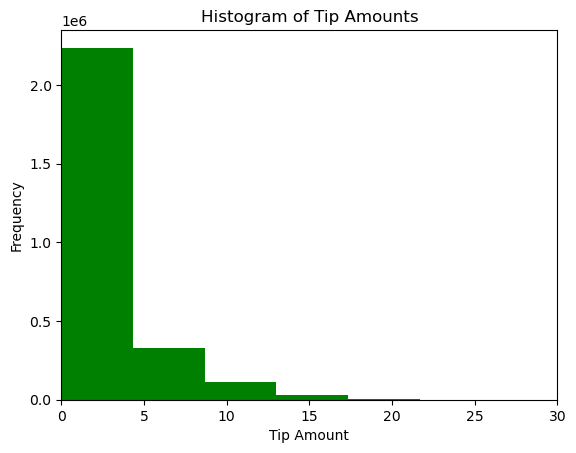

Minimum amount value is  0.01
Maximum amount value is  130.0
90% of the trips have a tip amount less or equal than  5.95


In [30]:
# some trips report 0 tip. it is assumed that these tips were paid in cash.
# for this study we drop all these rows
raw_data = raw_data[raw_data['tip_amount'] > 0]

# we also remove some outliers, namely those where the tip was larger than the fare cost
raw_data = raw_data[(raw_data['tip_amount'] <= raw_data['fare_amount'])]

# we remove trips with very large fare cost
raw_data = raw_data[((raw_data['fare_amount'] >=2) & (raw_data['fare_amount'] < 200))]

# we drop variables that include the target variable in it, namely the total_amount
clean_data = raw_data.drop(['total_amount'], axis=1)

# release memory occupied by raw_data as we do not need it anymore
# we are dealing with a large dataset, thus we need to make sure we do not run out of memory
del raw_data
gc.collect()

# print the number of trips left in the dataset
print("There are " + str(len(clean_data)) + " observations in the dataset.")
print("There are " + str(len(clean_data.columns)) + " variables in the dataset.")

plt.hist(clean_data.tip_amount.values, 30, histtype='bar', facecolor='g')
plt.xlim(0, 30)
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Tip Amounts')
plt.show()

print("Minimum amount value is ", np.min(clean_data.tip_amount.values))
print("Maximum amount value is ", np.max(clean_data.tip_amount.values))
print("90% of the trips have a tip amount less or equal than ", np.percentile(clean_data.tip_amount.values, 90))

<hr>
<div id="dataset_preprocessing">
    <h2>4.Dataset Preprocessing</h2>
</div>


In [8]:
# Convert 'tpep_dropoff_datetime' and 'tpep_pickup_datetime' columns to datetime objects
clean_data['tpep_dropoff_datetime'] = pd.to_datetime(clean_data['tpep_dropoff_datetime'])
clean_data['tpep_pickup_datetime'] = pd.to_datetime(clean_data['tpep_pickup_datetime'])

# Extract pickup and dropoff hour
clean_data['pickup_hour'] = clean_data['tpep_pickup_datetime'].dt.hour
clean_data['dropoff_hour'] = clean_data['tpep_dropoff_datetime'].dt.hour

# Extract pickup and dropoff day of the week (0 = Monday, 6 = Sunday)
clean_data['pickup_day'] = clean_data['tpep_pickup_datetime'].dt.weekday
clean_data['dropoff_day'] = clean_data['tpep_dropoff_datetime'].dt.weekday

# Calculate trip time in seconds
clean_data['trip_time'] = (clean_data['tpep_dropoff_datetime'] - clean_data['tpep_pickup_datetime']).dt.total_seconds()


In [9]:
data=clean_data.sort_values(by='tpep_pickup_datetime')
del clean_data
gc.collect()

78

In [10]:
data.drop(index=281946)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour,pickup_day,dropoff_day,trip_time
3091703,2,2008-12-31 23:05:05,2009-01-01 05:00:47,1.0,8.85,1.0,N,170.0,138.0,1.0,...,0.5,10.93,6.12,0.3,2.5,23,5,2,3,21342.0
459216,2,2008-12-31 23:11:48,2009-01-01 01:45:44,2.0,18.84,2.0,N,132.0,264.0,1.0,...,0.5,12.28,6.12,0.3,0.0,23,1,2,3,9236.0
3356848,2,2009-01-01 00:05:27,2009-01-01 00:21:53,1.0,7.77,1.0,N,138.0,41.0,1.0,...,0.5,5.98,6.12,0.3,0.0,0,0,3,3,986.0
657225,2,2009-01-01 00:06:39,2009-01-01 21:10:31,5.0,1.10,1.0,N,234.0,170.0,1.0,...,0.5,1.96,0.00,0.3,2.5,0,21,3,3,75832.0
628840,2,2009-01-01 00:06:41,2009-01-01 19:45:29,1.0,1.15,1.0,N,161.0,161.0,1.0,...,0.5,1.00,0.00,0.3,2.5,0,19,3,3,70728.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289274,2,2019-09-28 18:33:49,2019-09-28 18:45:28,2.0,1.88,1.0,N,43.0,233.0,1.0,...,0.5,2.66,0.00,0.3,2.5,18,18,5,5,699.0
668781,2,2019-10-09 02:27:10,2019-10-09 02:32:46,1.0,1.39,1.0,N,186.0,230.0,1.0,...,0.5,2.06,0.00,0.3,2.5,2,2,2,2,336.0
668782,2,2019-10-09 02:34:17,2019-10-09 02:47:59,1.0,2.73,1.0,N,230.0,141.0,1.0,...,0.5,3.95,0.00,0.3,2.5,2,2,2,2,822.0
668783,2,2019-10-09 02:57:09,2019-10-09 03:00:15,2.0,0.62,1.0,N,237.0,236.0,1.0,...,0.5,2.08,0.00,0.3,2.5,2,3,2,2,186.0


In [11]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

<h3>Correlation Analysis</h3>
<p>Correlation analysis was performed to understand how different factors affect the tip amount:</p>

<ul>
<li>Trip Distance: Highest positive correlation with tip amount (0.8), indicating longer trips tend to receive higher tips.</li>
<li>Congestion Surcharge: Highest negative correlation with tip amount (-0.2), indicating that trips with a congestion surcharge tend to receive lower tips.</li>
<ul>

In [12]:
data = data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime','PULocationID','DOLocationID'], axis=1)
data = data.drop(['store_and_fwd_flag', 'payment_type'], axis=1)
data["VendorID","passenger_count",'trip_distance','RatecodeID','fare_amount	extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge'].corr()

,VendorID,passenger_count,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour,pickup_day,dropoff_day,trip_time
VendorID,1.000000,0.202199,0.024527,0.016950,0.023203,-0.863893,0.004100,0.032897,0.017817,-0.007515,-0.014582,-0.001919,-0.003392,0.015941,0.016057,0.033720
passenger_count,0.202199,1.000000,0.007590,-0.001946,0.004953,-0.192068,0.003603,0.008178,0.004645,0.000549,0.000312,0.010422,0.009583,0.032756,0.032780,0.012084
trip_distance,0.024527,0.007590,1.000000,0.370755,0.905806,-0.018625,-0.129049,0.810086,0.657707,0.007635,-0.238564,-0.010744,-0.009171,0.014930,0.013607,0.164667
RatecodeID,0.016950,-0.001946,0.370755,1.000000,0.535009,-0.034310,-0.471624,0.455102,0.375040,-0.158160,-0.231601,-0.010061,-0.005366,0.010232,0.009322,0.048860
fare_amount,0.023203,0.004953,0.905806,0.535009,1.000000,-0.030251,-0.273789,0.873161,0.653851,-0.041704,-0.279923,-0.001545,0.003537,-0.002598,-0.003395,0.168367
extra,-0.863893,-0.192068,-0.018625,-0.034310,-0.030251,1.000000,0.042390,-0.018161,-0.016320,0.010814,0.153869,0.115694,0.112963,-0.081063,-0.080471,-0.027120
mta_tax,0.004100,0.003603,-0.129049,-0.471624,-0.273789,0.042390,1.000000,-0.227717,-0.287616,0.039689,0.231904,0.012524,0.009975,-0.006111,-0.005931,-0.014262
tip_amount,0.032897,0.008178,0.810086,0.455102,0.873161,-0.018161,-0.227717,1.000000,0.654354,-0.031089,-0.209527,0.011213,0.017204,-0.014866,-0.015535,0.145670
tolls_amount,0.017817,0.004645,0.657707,0.375040,0.653851,-0.016320,-0.287616,0.654354,1.000000,0.001845,-0.151268,-0.010787,-0.001175,-0.008045,-0.009294,0.101515
improvement_surcharge,-0.007515,0.000549,0.007635,-0.158160,-0.041704,0.010814,0.039689,-0.031089,0.001845,1.000000,0.034257,0.001845,0.001423,-0.001625,-0.001515,-0.004739


<p><h3>Categorization of Features</h3></p>
The following features were categorized:
<ul>
<li>VendorID</li>
<li>RatecodeID</li>
<li>Pickup Hour</li>
<li>Dropoff Hour</li>
<li>These features were categorized to transform them into a format suitable for machine learning models and to capture the categorical nature of these variables.</li>
</ul>

In [13]:
data_copy = data.copy()

In [14]:
get_dummy_col = ["VendorID","RatecodeID", "pickup_hour", "dropoff_hour"]
proc_data = pd.get_dummies(data, columns = get_dummy_col)

del data
gc.collect()

0

<p><h3>Variables</h3>
<li>Independent Variables (X): All features except 'tip_amount'.</li>
<li>Dependent Variable (Y): 'tip_amount'.</li></p>

In [15]:
# extract the labels from the dataframe
y = proc_data[['tip_amount']].values.astype('float32')

# drop the target variable from the feature matrix
proc_data = proc_data.drop(['tip_amount'], axis=1)

# get the feature matrix used for training
X = proc_data.values

# normalize the feature matrix
X = normalize(X, axis=1, norm='l1', copy=False)

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (2712719, 69) y.shape= (2712719, 1)


<h3>Data analysis for classification modelling</h3>

The tip distribution plot means that people are most likely to pay exactly 4-6 dollars as tips

Text(0.5, 1.0, 'Tip distribution')

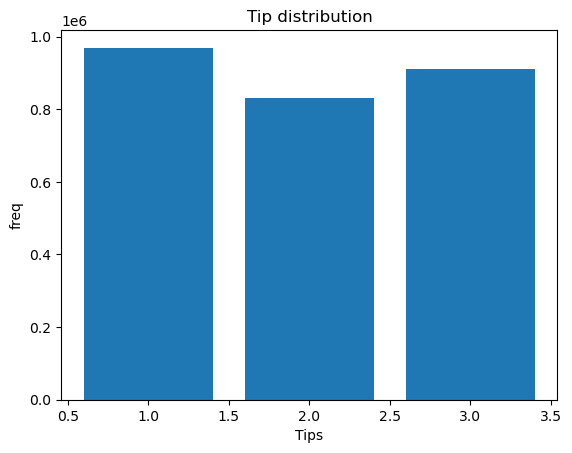

In [16]:
bins = [0,  np.percentile(data_copy.tip_amount.values, 33), np.percentile(data_copy.tip_amount.values, 66), np.inf]
labels = [1, 2, 3]
data_copy ['multi_class_target'] = pd.cut(data_copy["tip_amount"], bins=bins, labels=labels)

plt.bar(data_copy['multi_class_target'].unique(), data_copy['multi_class_target'].value_counts().values)
plt.xlabel("Tips")
plt.ylabel("freq")
plt.title("Tip distribution")

<p><h3>Variables</h3>
<li>Independent Variables (X): All features except 'categorized tip amount'.</li>
<li>Dependent Variable (Y): categorized tip amount (low , meduim and high).</li></p>

In [17]:
xprob=data_copy[['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
        'fare_amount', 'extra', 'mta_tax','tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'pickup_hour', 'dropoff_hour', 'pickup_day',
       'dropoff_day', 'trip_time']].values
y1 = data_copy['multi_class_target'].values

<hr>
<div id="dataset_split">
    <h2>5.Dataset Train/Test Split</h2>
</div>


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1898903, 69) Y_train.shape= (1898903, 1)
X_test.shape= (813816, 69) Y_test.shape= (813816, 1)


<hr>
<div id="Decision Tree Regressor model and Evaluation">
    <h2>6.Decision Tree Regressor model and Evaluation</h2>
</div>


<p>A Decision Tree Regressor was used to model the tip amount:</p>

<ul>
<li>Training: The model was trained using the training dataset(X_train,y_train).</li>
<li>Evaluation: The model's performance was evaluated on the test dataset to predict future tips.</li>
<li>Metrics: The mean squared error (MSE) of the model was 1.689, indicating the average squared difference between the predicted and actual tip amounts. The R-squared value was 0.76746, suggesting that approximately 76.75% of the variance in the tip amount is explained by the model.
Visualization: A density plot was created using the Seaborn library to compare the distribution of predicted tips with actual tips in the test dataset. This visualization helps to assess how well the predicted values align with the true values.</li>
</ul>

In [19]:
sklearn_dt = DecisionTreeRegressor(max_depth=8, random_state=35)
sklearn_dt.fit(X_train, y_train)
y_pred=sklearn_dt.predict(X_test)
print("mean squared error:", mean_squared_error(y_test,y_pred))
print("R-squared Error:",r2_score(y_test,y_pred))

mean squared error: 1.6894026501370476
R-squared Error: 0.7674676404953005


Text(0, 0.5, 'Density')

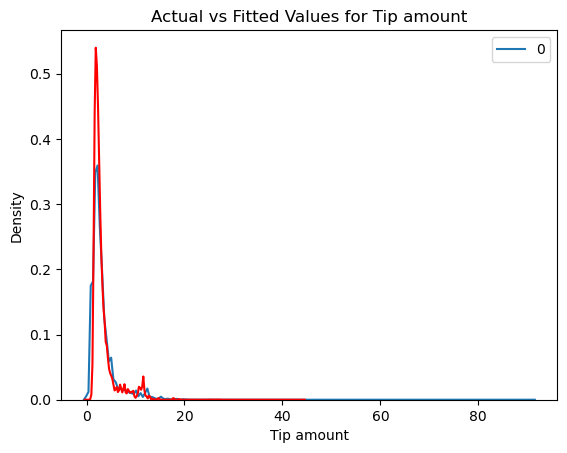

In [42]:
import seaborn as sns
sns.kdeplot(y_test,color="b", label="Actual Value")
sns.kdeplot(y_pred, color="r", label="Fitted Values")
plt.title('Actual vs Fitted Values for Tip amount')
plt.xlabel('Tip amount')
plt.ylabel('Density')

In [21]:
X1_train, X1_test, y1_train, y1_test = train_test_split(xprob, y1, test_size=0.4, random_state=42)

<hr>
<div id="LOGISTIC REGRESSION">
<h2><b>7.LOGISTIC REGRESSION FOR TIP CATEGORIZATION</b></h2>
</div>

<div>A Logistic Regression model was used to categorize the predicted tips:
<ul>
<li><p>Categorization: The <code>tip_amount</code> feature was categorized into `low`, `medium`, and `high` using the pd.get_dummies function.</p>
<p><code>Low</code>: 1-2</p>
<p><code>Medium</code>: 2.1-2.5</p>
<p><code>High</code>: 4-7</p>
</li>
<li>Training: The model was trained on the same training dataset to predict the probability of each category.</li>
<li>Evaluation: The performance of the logistic regression model was evaluated using a confusion matrix and classification report.</li>
</ul>
</div>

In [22]:
log_reg1 = LogisticRegression()
log_reg1.fit(X1_train, y1_train)

LogisticRegression()

In [23]:
y1_prob = log_reg1.predict_proba(X1_test)[:, 0]
y2_prob = log_reg1.predict_proba(X1_test)[:, 1]
y3_prob = log_reg1.predict_proba(X1_test)[:, 2]

probabilities = pd.DataFrame({
    'low': y1_prob,
    'medium': y2_prob,
    'high': y3_prob
})

# Determine the target with the highest probability for each input
probabilities['most_likely_target'] = probabilities.idxmax(axis=1)
probabilities['y_data']=y1_test #data_copy['tip_amount'](testing set)
probabilities['tip_amount_testset']=X1_test[:,7]
probabilities

,low,medium,high,most_likely_target,y_data,tip_amount_testset
0,0.424468,0.415835,0.159697,low,1,2.00
1,0.132875,0.294546,0.572580,high,2,2.75
2,0.360208,0.399177,0.240616,medium,1,1.40
3,0.305266,0.374358,0.320376,medium,1,1.03
4,0.331905,0.400674,0.267421,medium,1,1.92
...,...,...,...,...,...,...
1085083,0.403388,0.419265,0.177347,medium,2,2.56
1085084,0.485922,0.413744,0.100334,low,2,2.66
1085085,0.242353,0.376745,0.380903,high,2,2.46
1085086,0.030273,0.137139,0.832588,high,3,4.25


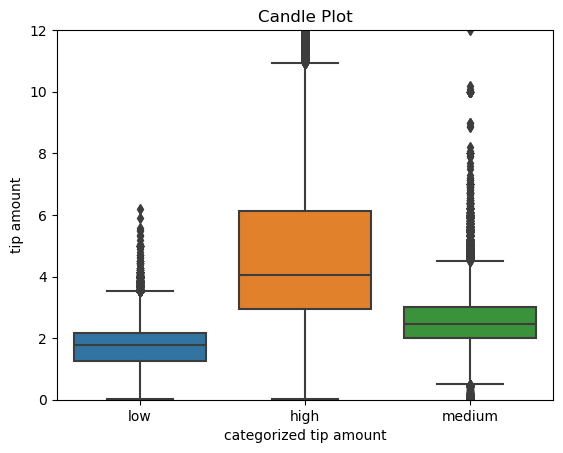

In [24]:
sns.boxplot(x="most_likely_target", y="tip_amount_testset", data=probabilities)

plt.ylim( 0, 12)

plt.xlabel('categorized tip amount')
plt.ylabel('tip amount')
plt.title('Candle Plot')

# Show the plot
plt.show()

In [25]:
mean_probabilities = np.mean(probabilities[['low','medium','high']], axis=0)
print("Mean probabilities for each class:", mean_probabilities)

Mean probabilities for each class: low       0.302075
medium    0.322004
high      0.375921
dtype: float64


In [26]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
pred = log_reg1.predict(X1_test) 

In [28]:
p =confusion_matrix(y1_test, pred)
p

array([[241841,  92059,  53775],
       [111546, 152587,  68271],
       [  5870,  74314, 284825]], dtype=int64)

In [29]:
print(classification_report(y1_test, pred))

              precision    recall  f1-score   support

           1       0.67      0.62      0.65    387675
           2       0.48      0.46      0.47    332404
           3       0.70      0.78      0.74    365009

    accuracy                           0.63   1085088
   macro avg       0.62      0.62      0.62   1085088
weighted avg       0.62      0.63      0.62   1085088



In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y1_test, pred))

DecisionTrees's Accuracy:  0.6259888598897048


<hr>
<div id="RANDOM FOREST">
<h2><b>8.RANDOM FOREST</b></h2>
</div>

<div>A Random Forest model was used as a comparison method to determine the probability of the predicted tips falling into 'low', 'medium', or 'high' categories:
<ul>
<li><p>Categorization: The 'tip_amount' feature was categorized as follows:</p>
<p>'Low': 1-2</p>
<p>'Medium': 2.1-2.3</p>
<p>'High': 4-6.5</p>
</li>
<li>Training: The Random Forest model was trained on the same dataset as the logistic regression model.</li>
<li>Evaluation:The performance of the Random Forest model was evaluated using a confusion matrix and classification report.</li>
</ul>
</div>

In [31]:
ran = RandomForestClassifier(max_depth=8, random_state=35)
ran.fit(X1_train, y1_train)

RandomForestClassifier(gpu_ids=array([0], dtype=uint32), max_depth=8,
                       random_state=35)

In [32]:
y1_ran = ran.predict_proba(X1_test)[:, 0]
y2_ran = ran.predict_proba(X1_test)[:, 1]
y3_ran = ran.predict_proba(X1_test)[:, 2]

# Combine probabilities into a DataFrame for comparison
prob = pd.DataFrame({
    'low': y1_ran,
    'medium': y2_ran,
    'high': y3_ran
})

# Determine the target with the highest probability for each input
prob['most_likely_target'] = prob.idxmax(axis=1)
prob['y_data']=y1_test
prob['tip_amount_testset']=X1_test[:,7]
prob

,low,medium,high,most_likely_target,y_data,tip_amount_testset
0,0.932332,0.061465,0.006203,low,1,2.00
1,0.201755,0.725982,0.072263,medium,2,2.75
2,0.986762,0.012878,0.000359,low,1,1.40
3,0.932332,0.061465,0.006203,low,1,1.03
4,0.926323,0.059446,0.014231,low,1,1.92
...,...,...,...,...,...,...
1085083,0.028212,0.918729,0.053059,medium,2,2.56
1085084,0.028212,0.918729,0.053059,medium,2,2.66
1085085,0.030087,0.918157,0.051756,medium,2,2.46
1085086,0.018652,0.011404,0.969944,high,3,4.25


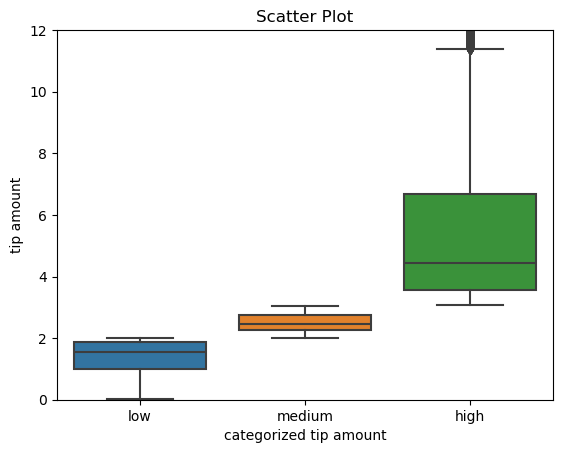

In [33]:
sns.boxplot(x="most_likely_target", y="tip_amount_testset", data=prob)

plt.ylim( 0, 12)

plt.xlabel('categorized tip amount')
plt.ylabel('tip amount')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [34]:
mean_prob = np.mean(prob[['low','medium','high']], axis=0)
print("Mean probabilities for each class:", mean_probabilities)

Mean probabilities for each class: low       0.302075
medium    0.322004
high      0.375921
dtype: float64


In [35]:
y1_test.shape

(1085088,)

In [36]:
prob.shape

(1085088, 6)

In [37]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
pred_ran = ran.predict(X1_test) 

In [39]:
p_ran =confusion_matrix(y1_test, pred_ran)
p_ran

array([[387675,      0,      0],
       [     0, 332404,      0],
       [     0,      0, 365009]], dtype=int64)

In [40]:
print(classification_report(y1_test, pred_ran))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    387675
           2       1.00      1.00      1.00    332404
           3       1.00      1.00      1.00    365009

    accuracy                           1.00   1085088
   macro avg       1.00      1.00      1.00   1085088
weighted avg       1.00      1.00      1.00   1085088



In [41]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y1_test, pred_ran))

DecisionTrees's Accuracy:  1.0


<hr>
<div id="CONCLUSION">
<h2><b>9.CONCLUSION</b></h2>
</div>

<p>The logistic regression model achieved an overall accuracy of 63%, with an F1-score of 0.65 for the 'low' category, 0.47 for the 'medium' category, and 0.74 for the 'high' category. The random forest model, on the other hand, achieved perfect scores with an accuracy of 100% across all categories.

While the random forest model shows superior performance with perfect precision, recall, and F1-scores, these results suggest potential overfitting, especially given the real-world complexity of tipping behavior. The logistic regression model, although less accurate, may provide a more balanced and realistic prediction by capturing the natural variability in tipping behavior.

The visualization with candle plots further helps to understand the distribution and bias of predictions, offering insights into how each model handles different tip categories. These models, in combination, can be useful tools for predicting both the exact amount and the probability of different tipping behaviors, aiding stakeholders in making informed decisions to enhance the taxi service experience.</p>